In [ ]:
import torch, os
import pandas as pd
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from torch.utils.data import Dataset
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_org = pd.read_csv('/content/drive/MyDrive/CodingFiles/BenefitCodingv8.csv')
df_org = df_org.sample(frac=1.0, random_state=42)

Mounted at /content/drive


In [ ]:
labels = df_org['category'].unique().tolist()
labels = [s.strip() for s in labels ]
labels

['Long-term or Sustained efficacy',
 'Other',
 'Fast or immediate results',
 'Easy to use or administer',
 'Good side effect profile',
 'Good safety or higher safety compared to others',
 'Oral route or tablet formulation',
 'Cheap or Affordable',
 'Good efficacy or results',
 'Improves quality of life']

In [ ]:
for key, value in enumerate(labels):
    print(value)

Long-term or Sustained efficacy
Other
Fast or immediate results
Easy to use or administer
Good side effect profile
Good safety or higher safety compared to others
Oral route or tablet formulation
Cheap or Affordable
Good efficacy or results
Improves quality of life


In [ ]:
NUM_LABELS= len(labels)

id2label={id:label for id,label in enumerate(labels)}

label2id={label:id for id,label in enumerate(labels)}

In [ ]:
label2id

{'Long-term or Sustained efficacy': 0,
 'Other': 1,
 'Fast or immediate results': 2,
 'Easy to use or administer': 3,
 'Good side effect profile': 4,
 'Good safety or higher safety compared to others': 5,
 'Oral route or tablet formulation': 6,
 'Cheap or Affordable': 7,
 'Good efficacy or results': 8,
 'Improves quality of life': 9}

In [ ]:
id2label

{0: 'Long-term or Sustained efficacy',
 1: 'Other',
 2: 'Fast or immediate results',
 3: 'Easy to use or administer',
 4: 'Good side effect profile',
 5: 'Good safety or higher safety compared to others',
 6: 'Oral route or tablet formulation',
 7: 'Cheap or Affordable',
 8: 'Good efficacy or results',
 9: 'Improves quality of life'}

In [ ]:
df_org["labels"]=df_org.category.map(lambda x: label2id[x.strip()])

In [ ]:
df_org.head()

,text,category,labels
16968,The sustained efficacy of Hypothetical Product...,Long-term or Sustained efficacy,0
4148,"Hypothetical Product X offers extended relief,...",Long-term or Sustained efficacy,0
3263,Hypothetical Product X integrates well with my...,Other,1
5721,I experienced immediate benefits that were ver...,Fast or immediate results,2
6235,I find it very simple to use this product ever...,Easy to use or administer,3


<Axes: ylabel='count'>

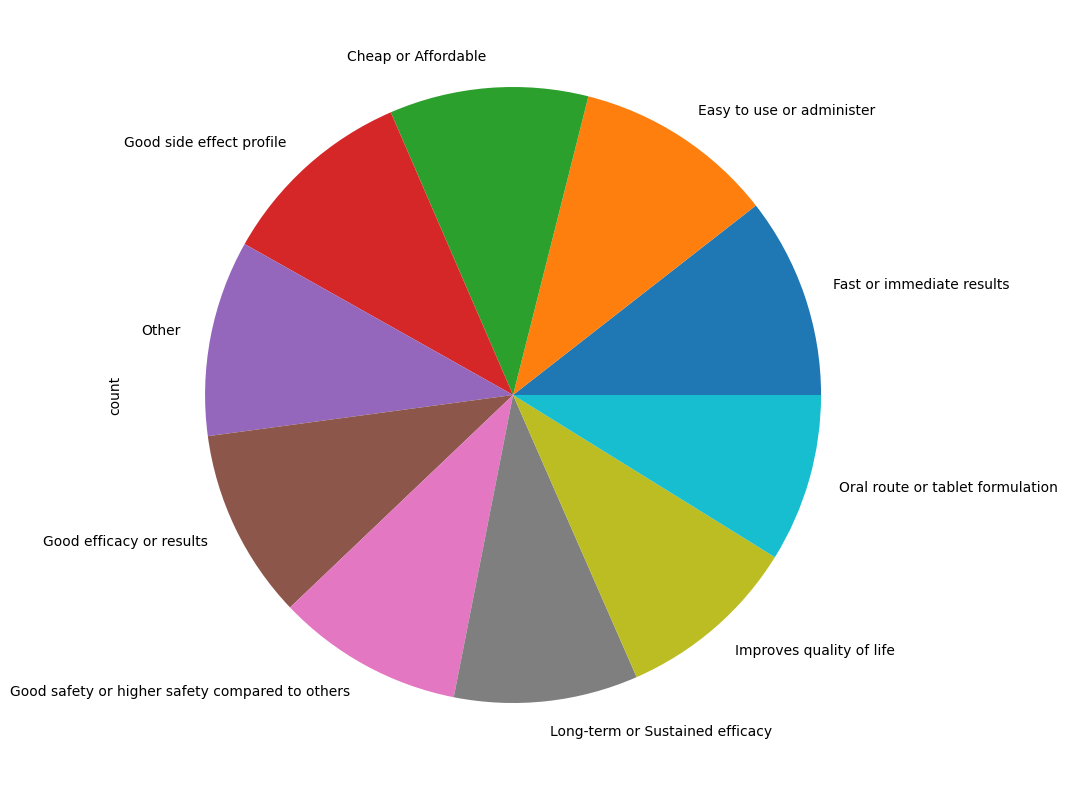

In [ ]:
df_org.category.value_counts().plot(kind='pie', figsize=(10,10))

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("distilbert/distilbert-base-uncased", max_length=512)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizerFast'.


In [ ]:
model = BertForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased", num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)
model.to(device)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.ou

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
SIZE= df_org.shape[0]

train_texts= list(df_org.text[:SIZE//2])

val_texts=   list(df_org.text[SIZE//2:(3*SIZE)//4 ])

test_texts=  list(df_org.text[(3*SIZE)//4:])

train_labels= list(df_org.labels[:SIZE//2])

val_labels=   list(df_org.labels[SIZE//2:(3*SIZE)//4])

test_labels=  list(df_org.labels[(3*SIZE)//4:])
train_texts = [str(text) for text in train_texts]
val_texts = [str(text) for text in val_texts]
test_texts = [str(text) for text in test_texts]

In [ ]:
len(train_texts), len(val_texts), len(test_texts)

(10502, 5251, 5252)

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [ ]:
class DataLoader(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # Retrieve tokenized data for the given index
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Add the label for the given index to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):

        return len(self.labels)

In [ ]:
train_dataloader = DataLoader(train_encodings, train_labels)

val_dataloader = DataLoader(val_encodings, val_labels)

test_dataset = DataLoader(test_encodings, test_labels)

In [ ]:
from transformers import TrainingArguments, Trainer

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):

    # Extract true labels from the input object
    labels = pred.label_ids

    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)

    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)

    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./TTC4900Model',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory
    logging_dir='./multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned
    model=model,
     # training arguments that we defined above
    args=training_args,
    train_dataset=train_dataloader,
    eval_dataset=val_dataloader,
    compute_metrics= compute_metrics
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,2.291900,2.166499,0.336126,0.218900,0.188398,0.333030
100,1.685500,1.198445,0.592839,0.583380,0.758227,0.594552
150,1.029400,0.951882,0.708817,0.687535,0.815793,0.706732
200,0.714100,0.381323,0.890687,0.889881,0.900735,0.893751
250,0.415800,0.255170,0.935441,0.936048,0.937649,0.935868
300,0.302700,0.258464,0.925728,0.925343,0.927488,0.925271
350,0.218700,0.263572,0.922491,0.925637,0.935666,0.923841
400,0.297900,0.281398,0.922110,0.923216,0.931249,0.923761
450,0.245200,0.143479,0.960960,0.961246,0.961898,0.960979
500,0.216700,0.143100,0.965911,0.966327,0.966847,0.966282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,2.291900,2.166499,0.336126,0.218900,0.188398,0.333030
100,1.685500,1.198445,0.592839,0.583380,0.758227,0.594552
150,1.029400,0.951882,0.708817,0.687535,0.815793,0.706732
200,0.714100,0.381323,0.890687,0.889881,0.900735,0.893751
250,0.415800,0.255170,0.935441,0.936048,0.937649,0.935868
300,0.302700,0.258464,0.925728,0.925343,0.927488,0.925271
350,0.218700,0.263572,0.922491,0.925637,0.935666,0.923841
400,0.297900,0.281398,0.922110,0.923216,0.931249,0.923761
450,0.245200,0.143479,0.960960,0.961246,0.961898,0.960979
500,0.216700,0.143100,0.965911,0.966327,0.966847,0.966282


TrainOutput(global_step=1971, training_loss=0.2577684864908351, metrics={'train_runtime': 542.375, 'train_samples_per_second': 58.089, 'train_steps_per_second': 3.634, 'total_flos': 1181997228207096.0, 'train_loss': 0.2577684864908351, 'epoch': 3.0})

In [ ]:
q=[trainer.evaluate(eval_dataset=df_org) for df_org in [train_dataloader, val_dataloader, test_dataset]]

pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.037916,0.990668,0.990718,0.990720,0.990817
val,0.077227,0.982289,0.982271,0.982097,0.982617
test,0.103632,0.978484,0.978464,0.978520,0.978778


In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

In [ ]:
def predict(text):

    # Tokenize the input text and move tensors to the GPU if available
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to(device)

    # Get model output (logits)
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)

    # Get the index of the class with the highest probability
    # argmax() finds the index of the maximum value in the tensor along a specified dimension.
    # By default, if no dimension is specified, it returns the index of the maximum value in the flattened tensor.
    pred_label_idx = probs.argmax()

    # Now map the predicted class index to the actual class label
    # Since pred_label_idx is a tensor containing a single value (the predicted class index),
    # the .item() method is used to extract the value as a scalar
    pred_label = model.config.id2label[pred_label_idx.item()]
   # print("Avaliable classes to code-in \n 1- Fast or immediate results / 2 - Good efficacy or results / 3 - Good safety or higher safety compared to others / 4 - Good side effect profile / 5 - Oral route or tablet formulation / 6 - Easy to use or administer / 7 - Cheap or Affordable / 8 - Long-term or Sustained efficacy / 9 - Improves quality of life / 10 - Other")

    return probs, pred_label_idx, pred_label

In [ ]:
# Test with a an example text in Turkish
text = "cheaper than other"
# "Machine Learning itself is moving towards more and more automated"
predict(text)

(tensor([[7.1657e-05, 2.3199e-04, 3.4381e-05, 6.0785e-05, 5.4142e-05, 8.3816e-05,
          2.7897e-05, 9.9935e-01, 4.3632e-05, 4.2331e-05]], device='cuda:0',
        grad_fn=<SoftmaxBackward0>),
 tensor(7, device='cuda:0'),
 'Cheap or Affordable')

In [ ]:
model_path = "TraineddistilBERTModelv2"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('TraineddistilBERTModelv2/tokenizer_config.json',
 'TraineddistilBERTModelv2/special_tokens_map.json',
 'TraineddistilBERTModelv2/vocab.txt',
 'TraineddistilBERTModelv2/added_tokens.json',
 'TraineddistilBERTModelv2/tokenizer.json')

In [ ]:
model_path = "TraineddistilBERTModelv2"

model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer= BertTokenizerFast.from_pretrained(model_path)
nlp= pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
nlp2= pipeline("text-classification", model=model, tokenizer=tokenizer)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
nlp("It can significantly improve patients' quality of life.")
nlp2("It can significantly improve patients' quality of life.")


[{'label': 'Improves quality of life', 'score': 0.9985535740852356}]

In [ ]:
nlp2("best results")


[{'label': 'Good efficacy or results', 'score': 0.9975680708885193}]

In [ ]:
nlp2("less cost than other")

[{'label': 'Cheap or Affordable', 'score': 0.9865388870239258}]

In [ ]:
from google.colab import files
import shutil

shutil.make_archive('TraineddistilBERTModelv2', 'zip', 'TraineddistilBERTModelv2')

'/content/TraineddistilBERTModelv2.zip'

In [ ]:
files.download('TraineddistilBERTModelv2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>